In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# !unzip "/content/drive/MyDrive/14828 Browser Security Project/result_zips/analysis_from5to12am.zip" -d "/content/drive/MyDrive/14828 Browser Security Project/DoubleX_Results"

In [4]:
# !rm -rf "/content/drive/MyDrive/14828 Browser Security Project/DoubleX_Results/__MACOSX"

In [5]:
ext_results_path = "/content/drive/MyDrive/14828 Browser Security Project/DoubleX_Results"
all_exts = os.listdir(ext_results_path)
print("Number of extensions: ", len(all_exts))

# all_exts_dict = {"id": all_exts}
# df = pd.DataFrame(all_exts_dict)
# df.to_csv("all_exts.csv")

Number of extensions:  1465


## Analysis: Dangers

In [6]:
def extract_dangers(dangers):
  if len(dangers) == 0:
    return None
  items = []  
  for _,v in dangers.items():
    items.append({'danger': v['danger'], 'value': v['value'], 'dataflow': bool(v['dataflow'])})
  return pd.DataFrame(items)

In [7]:
def add_danger(df, danger_obj):
  dangers = extract_dangers(danger_obj)
  if dangers is not None:
    return pd.concat([df, dangers])
  return df

In [8]:
%%capture 
df_cols = ['danger', 'value', 'dataflow']

df_cs_direct_dangers = pd.DataFrame(columns=df_cols)
df_cs_indirect_dangers = pd.DataFrame(columns=df_cols)
df_cs_exfiltration_dangers = pd.DataFrame(columns=df_cols)
df_bp_direct_dangers = pd.DataFrame(columns=df_cols)
df_bp_indirect_dangers = pd.DataFrame(columns=df_cols)
df_bp_exfiltration_dangers = pd.DataFrame(columns=df_cols)

In [9]:
%%capture 
for ext in all_exts:
  data = pd.read_json("{}/{}".format(ext_results_path, ext))
  df_cs_direct_dangers = add_danger(df_cs_direct_dangers, data.cs.direct_dangers)
  df_cs_indirect_dangers = add_danger(df_cs_indirect_dangers, data.cs.indirect_dangers)
  df_cs_exfiltration_dangers = add_danger(df_cs_exfiltration_dangers, data.cs.exfiltration_dangers)
  df_bp_direct_dangers = add_danger(df_bp_direct_dangers, data.bp.direct_dangers)
  df_bp_indirect_dangers = add_danger(df_bp_indirect_dangers, data.bp.indirect_dangers)
  df_bp_exfiltration_dangers = add_danger(df_bp_exfiltration_dangers, data.bp.exfiltration_dangers)

In [10]:
direct_dangers_count = df_cs_direct_dangers.shape[0] + df_bp_direct_dangers.shape[0]
print(f"content script direct dangers: {df_cs_direct_dangers.shape[0]}")
print(f"background script direct dangers: {df_bp_direct_dangers.shape[0]}")
print(f"total direct dangers: {direct_dangers_count}")

content script direct dangers: 1271
background script direct dangers: 588
total direct dangers: 1859


In [11]:
indirect_dangers_count = df_cs_indirect_dangers.shape[0] + df_bp_indirect_dangers.shape[0]
print(f"content script indirect dangers: {df_cs_indirect_dangers.shape[0]}")
print(f"background script indirect dangers: {df_bp_indirect_dangers.shape[0]}")
print(f"total indirect dangers: {indirect_dangers_count}")

content script indirect dangers: 637
background script indirect dangers: 519
total indirect dangers: 1156


In [12]:
exfiltration_dangers_count = df_cs_exfiltration_dangers.shape[0] + df_bp_exfiltration_dangers.shape[0]
print(f"content script exfiltration dangers: {df_cs_exfiltration_dangers.shape[0]}")
print(f"background script exfiltration dangers: {df_bp_exfiltration_dangers.shape[0]}")
print(f"total exfiltration dangers: {exfiltration_dangers_count}")

content script exfiltration dangers: 0
background script exfiltration dangers: 617
total exfiltration dangers: 617


In [13]:
df_cs_direct_dangers.head(10)

,danger,value,dataflow
0,setTimeout,setTimeout(<pdg_js.node.FunctionExpression obj...,False
0,XMLHttpRequest.open,"XMLHttpRequest().open(d.method.toUpperCase(), ...",False
1,setTimeout,setTimeout(l),False
2,setTimeout,"x.slice.call({'arguments': {}, 0: '[None] argu...",False
3,setTimeout,setTimeout(<pdg_js.node.FunctionExpression obj...,False
4,setTimeout,setTimeout(<pdg_js.node.FunctionExpression obj...,False
5,setTimeout,setTimeout(<pdg_js.node.FunctionExpression obj...,False
6,setTimeout,"setTimeout(t, 1)",False
7,setTimeout,"window.setTimeout(this.track_callback(i, this....",False
8,setTimeout,setTimeout(<pdg_js.node.FunctionExpression obj...,False


In [14]:
pd.concat([df_cs_direct_dangers, df_bp_direct_dangers]).groupby(['danger']).size()

danger
XMLHttpRequest.open          83
document.write                8
downloads.download           17
eval                          7
scripting.executeScript     234
setInterval                 314
setTimeout                 1186
tabs.executeScript           10
dtype: int64

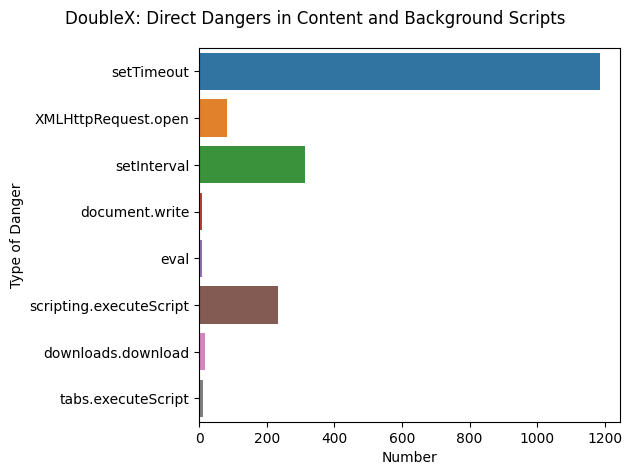

In [15]:
dir_df = pd.concat([df_cs_direct_dangers, df_bp_direct_dangers])

fig, ax = plt.subplots()
sns.countplot(y=dir_df["danger"])
plt.suptitle(f"DoubleX: Direct Dangers in Content and Background Scripts")
ax.set_xlabel("Number")
ax.set_ylabel("Type of Danger")
plt.tight_layout()
plt.savefig("Direct Dangers in Content and Background Scripts", dpi=500)

In [16]:
pd.concat([df_cs_indirect_dangers, df_bp_indirect_dangers]).groupby(['danger']).size()

danger
ajax                    51
fetch                  576
get                      9
post                     9
runtime.connect          2
runtime.sendMessage    509
dtype: int64

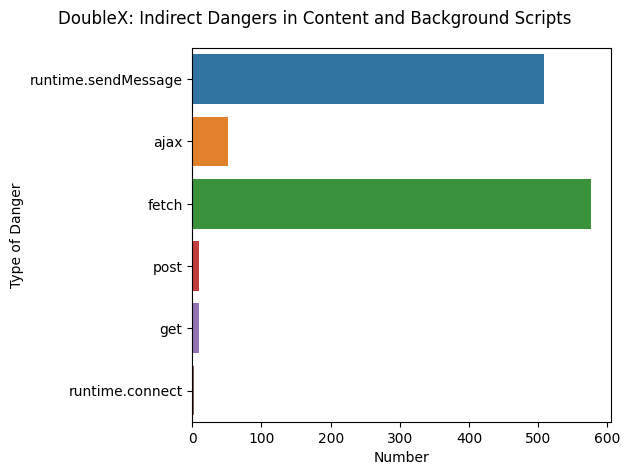

In [17]:
indir_df = pd.concat([df_cs_indirect_dangers, df_bp_indirect_dangers])

fig, ax = plt.subplots()
sns.countplot(y=indir_df["danger"])
plt.suptitle(f"DoubleX: Indirect Dangers in Content and Background Scripts")
ax.set_xlabel("Number")
ax.set_ylabel("Type of Danger")
plt.tight_layout()
plt.savefig("Indirect Dangers in Content and Background Scripts", dpi=500)

In [18]:
pd.concat([df_cs_exfiltration_dangers, df_bp_exfiltration_dangers]).groupby(['danger']).size()

<ipython-input-18-db9295d078c1>:1: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  pd.concat([df_cs_exfiltration_dangers, df_bp_exfiltration_dangers]).groupby(['danger']).size()


danger
bookmarks.getTree      4
cookies.getAll        27
history.search         2
storage.local.get    355
storage.sync.get     218
topSites.get          11
dtype: int64

<ipython-input-19-701510fcb4e2>:1: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  exfil_df = pd.concat([df_cs_exfiltration_dangers, df_bp_exfiltration_dangers])


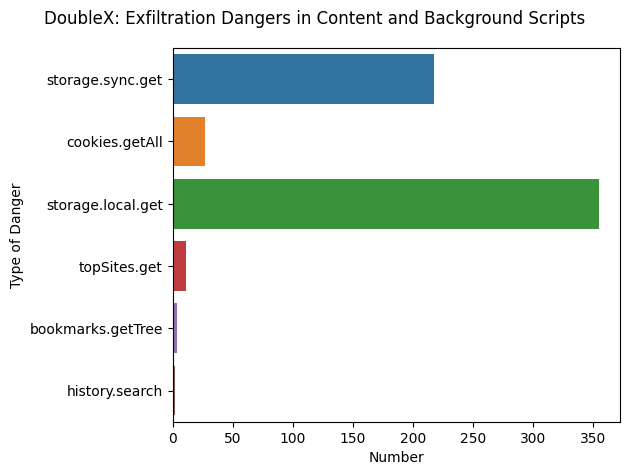

In [19]:
exfil_df = pd.concat([df_cs_exfiltration_dangers, df_bp_exfiltration_dangers])

fig, ax = plt.subplots()
sns.countplot(y=exfil_df["danger"])
plt.suptitle(f"DoubleX: Exfiltration Dangers in Content and Background Scripts")
ax.set_xlabel("Number")
ax.set_ylabel("Type of Danger")
plt.tight_layout()
plt.savefig("Exfiltration Dangers in Content and Background Scripts", dpi=500)

## Analysis: Extensions

### Build Dataset

Combine the following:
1. Extension metadata
2. Manifest file analysis
3. DoubleX analysis

In [20]:
# !unzip "/content/drive/MyDrive/14828 Browser Security Project/result_zips/metadata.zip" -d "/content/drive/MyDrive/14828 Browser Security Project/Metadata_Results"

In [21]:
# !unzip "/content/drive/MyDrive/14828 Browser Security Project/result_zips/manifest_analysis_new.zip" -d "/content/drive/MyDrive/14828 Browser Security Project/Manifest_Analysis_Results"

In [22]:
ext_df_filepath = "/content/drive/MyDrive/14828 Browser Security Project/ext_df_latest.csv"

In [23]:
CRITICAL_RISK_API_PERMISSIONS = ['webRequest', 'declarativeNetRequest']
CRITICAL_RISK_HOST_PERMISSIONS = ['*://*/', '*://*/', '<all_urls>']

HIGH_RISK_API_PERMISSIONS = ['scripting', 'tabs', 'webNavigation', 'downloads', 'clipboardRead', 'history']
HIGH_RISK_HOST_PERMISSIONS = ['file:///*', 'http://*/*', 'https://*/*']

In [24]:
if not os.path.exists(ext_df_filepath):
    ext_df = pd.DataFrame()

    for i, ext_id in enumerate(all_exts):
        print("Creating row for extension:", i)

        # load JSON files
        metadata_filepath = f"/content/drive/MyDrive/14828 Browser Security Project/Metadata_Results/metadata/{ext_id}.json"
        manifest_analysis_filepath = f"/content/drive/MyDrive/14828 Browser Security Project/Manifest_Analysis_Results/manifest_analysis_new/{ext_id}.json"
        doublex_analysis_filepath = f"/content/drive/MyDrive/14828 Browser Security Project/DoubleX_Results/{ext_id}"

        if os.path.exists(metadata_filepath):
          with open(metadata_filepath) as f:
            metadata_dict = json.load(f)
        else:
          continue

        if os.path.exists(manifest_analysis_filepath):
          with open(manifest_analysis_filepath) as f:
            manifest_analysis_dict = json.load(f)
        else:
          continue

        if os.path.exists(doublex_analysis_filepath):
          with open(doublex_analysis_filepath) as f:
            doublex_analysis_dict = pd.read_json(f)
        else:
          continue

        # create row (dict) for extension
        ext_row = {
            "extension_id": str(metadata_dict["extension_id"]),
            "avg_rating": float(metadata_dict["avg_rating"]),
            "num_users_who_rated": int(metadata_dict["num_users_who_rated"]),
            "num_users_who_downloaded": int(metadata_dict["num_users_who_downloaded"]),
            "category": str(metadata_dict["category"]),
            "num_api_permissions": int(manifest_analysis_dict["num_api_permissions"]),
            "num_host_permissions": int(manifest_analysis_dict["num_host_permissions"]),
            "is_csp_declared": int(manifest_analysis_dict["is_csp_declared"]),
            "num_wars": int(manifest_analysis_dict["num_wars"]),
            "num_ext_conn": int(manifest_analysis_dict["num_ext_conn"])
        }

        # critical risk api permissions
        for perm in CRITICAL_RISK_API_PERMISSIONS:
           dict_key = f"where_{perm}"
           ext_row[dict_key] = str(manifest_analysis_dict[dict_key])
        
        # high risk api permissions
        for perm in HIGH_RISK_API_PERMISSIONS:
           dict_key = f"where_{perm}"
           ext_row[dict_key] = str(manifest_analysis_dict[dict_key])

        # critical risk host permissions
        for perm in CRITICAL_RISK_HOST_PERMISSIONS:
           dict_key = f"where_{perm}"
           ext_row[dict_key] = str(manifest_analysis_dict[dict_key])
        
        # high risk host permissions
        for perm in HIGH_RISK_HOST_PERMISSIONS:
           dict_key = f"where_{perm}"
           ext_row[dict_key] = str(manifest_analysis_dict[dict_key])

        cs_dangers = doublex_analysis_dict['cs']
        ext_row["num_cs_direct_dangers"] = len(cs_dangers['direct_dangers'].keys())
        ext_row["num_cs_indirect_dangers"] = len(cs_dangers['indirect_dangers'].keys())
        ext_row["num_cs_exfil_dangers"] = len(cs_dangers['exfiltration_dangers'].keys())

        bp_dangers = doublex_analysis_dict['bp']
        ext_row["num_bp_direct_dangers"] = len(bp_dangers['direct_dangers'].keys())
        ext_row["num_bp_indirect_dangers"] = len(bp_dangers['indirect_dangers'].keys())
        ext_row["num_bp_exfil_dangers"] = len(bp_dangers['exfiltration_dangers'].keys())

        # append row to dataset
        ext_df = ext_df.append(ext_row, ignore_index=True)
      
    # save ext_df for future loading
    ext_df.to_csv("/content/drive/MyDrive/14828 Browser Security Project/ext_df_latest.csv")
else:
    ext_df = pd.read_csv(ext_df_filepath, index_col=0)

In [25]:
ext_df

,extension_id,avg_rating,num_users_who_rated,num_users_who_downloaded,category,num_api_permissions,num_host_permissions,is_csp_declared,num_wars,num_ext_conn,...,where_<all_urls>,where_file:///*,where_http://*/*,where_https://*/*,num_cs_direct_dangers,num_cs_indirect_dangers,num_cs_exfil_dangers,num_bp_direct_dangers,num_bp_indirect_dangers,num_bp_exfil_dangers
0,hfmgojlegmbjoacgdocldnbgndbehejc,0.0,0,5,Productivity,0,0,0,0,0,...,Not Declared,Not Declared,Not Declared,Not Declared,0,0,0,0,0,0
1,ifniehnojokofonkklceecajlecbcfjl,0.0,0,10,Developer Tools,2,0,1,0,0,...,Not Declared,Not Declared,Not Declared,Not Declared,1,3,0,0,0,1
2,ededkpbhbbdncjajeklocejfkedhhikm,0.0,0,3,Accessibility,1,0,0,0,0,...,Not Declared,Not Declared,Not Declared,Not Declared,0,0,0,0,0,0
3,eokcnpmhpilgomehaaboihllcgpmncko,0.0,0,382,Productivity,3,0,0,0,0,...,Not Declared,Not Declared,Not Declared,Not Declared,0,0,0,0,0,0
4,jnbmekkgllcampcfjkobpffkfglolekn,5.0,2,8,Productivity,4,1,0,4,0,...,Host Permissions,Not Declared,Not Declared,Not Declared,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,komooichefkcbdhhhicpplicceldpcmn,5.0,1,30,Social & Communication,5,0,0,0,0,...,Not Declared,Not Declared,Not Declared,Optional Host Permissions,0,0,0,0,0,0
1460,phgkmeaegpeoaobbicikppbbidcljhok,0.0,0,12,Productivity,5,1,1,3,0,...,Host Permissions,Not Declared,Not Declared,Not Declared,0,6,0,5,3,5
1461,oodgegammlfboachpohoiodepmifalke,5.0,2,3,Productivity,0,0,0,0,0,...,Not Declared,Not Declared,Not Declared,Not Declared,0,0,0,0,0,0
1462,fafmeoecefijagoogbkipapmjdnmbkgi,0.0,0,33,Productivity,4,3,0,0,0,...,Not Declared,Not Declared,Not Declared,Not Declared,0,0,0,0,1,3


### Exploratory Data Analysis

#### Extension Metadata

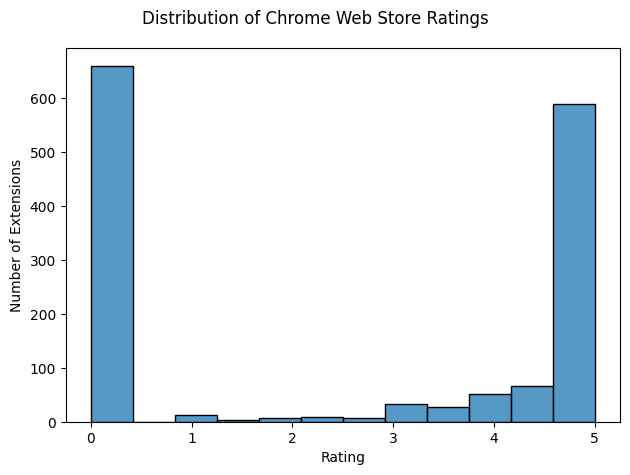

In [26]:
fig, ax = plt.subplots()
sns.histplot(data=ext_df, x="avg_rating")
plt.suptitle(f"Distribution of Chrome Web Store Ratings")
ax.set_xlabel("Rating")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Distribution of Chrome Web Store Ratings", dpi=500)

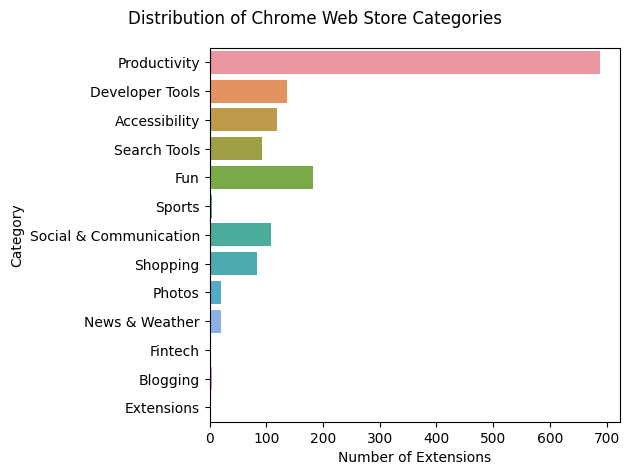

In [27]:
fig, ax = plt.subplots()
sns.countplot(data=ext_df, y="category")
plt.suptitle(f"Distribution of Chrome Web Store Categories")
ax.set_xlabel("Number of Extensions")
ax.set_ylabel("Category")
plt.tight_layout()
plt.savefig("Distribution of Chrome Web Store Categories", dpi=500)

#### Manifest File Analysis

Interesting observations:
1. Gifs autoplay for Google has 190 host permissions
  1. https://chrome.google.com/webstore/detail/gifs-autoplay-for-google/mfaepkdaodjclepbclabjbigjeohfdje
  1. hosts: all google domains

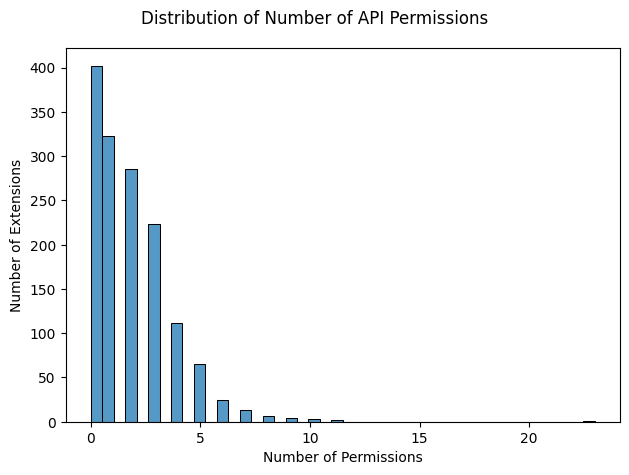

In [28]:
fig, ax = plt.subplots()
sns.histplot(data=ext_df, x="num_api_permissions")
plt.suptitle(f"Distribution of Number of API Permissions")
ax.set_xlabel("Number of Permissions")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Distribution of Number of API Permissions", dpi=500)

In [29]:
ext_df['num_api_permissions'].describe()

count    1464.000000
mean        1.870902
std         1.871943
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        23.000000
Name: num_api_permissions, dtype: float64

<Axes: xlabel='num_host_permissions', ylabel='Count'>

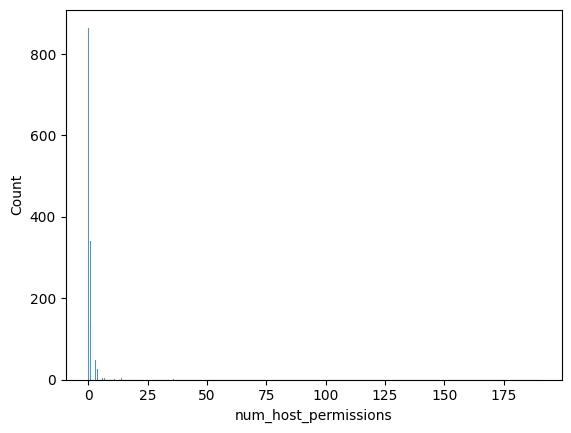

In [30]:
sns.histplot(data=ext_df, x="num_host_permissions")

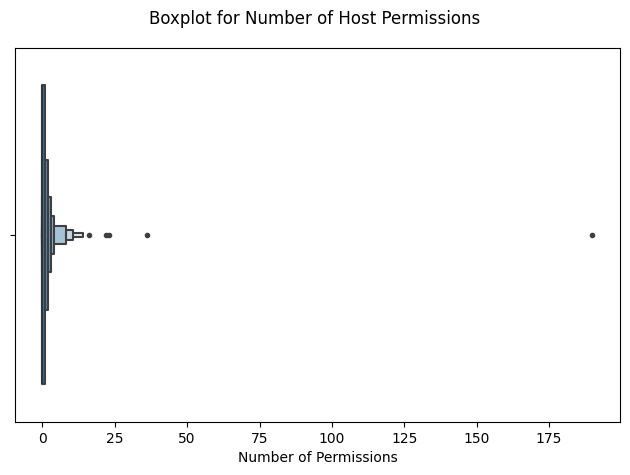

In [31]:
fig, ax = plt.subplots()
sns.boxenplot(data=ext_df, x="num_host_permissions",flier_kws={"marker": "."})
plt.suptitle(f"Boxplot for Number of Host Permissions")
ax.set_xlabel("Number of Permissions")
plt.tight_layout()
plt.savefig("Boxplot for Number of Host Permissions", dpi=500)

In [32]:
ext_df['num_host_permissions'].describe()

count    1464.000000
mean        1.006148
std         5.346180
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       190.000000
Name: num_host_permissions, dtype: float64

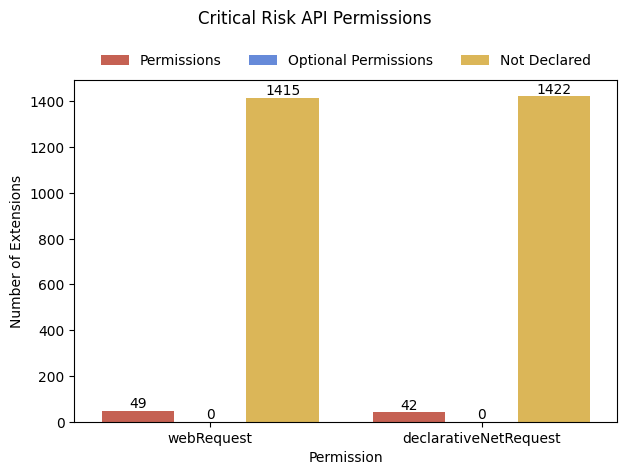

In [33]:
permission_types, declared_in = [], []
for perm in CRITICAL_RISK_API_PERMISSIONS:
    # get current permission's data
    key = f"where_{perm}"
    curr_declared_in = ext_df[key].to_numpy().flatten()
    curr_perm_types = [perm] * len(curr_declared_in)

    # add to full dict for plot
    permission_types.extend(curr_perm_types)
    declared_in.extend(curr_declared_in)

data_dict = {
    "Permission": permission_types,
    "Declared In": declared_in
}

fig, ax = plt.subplots()
sns.countplot(data=data_dict, 
              x="Permission", 
              hue="Declared In", 
              hue_order=["Permissions", "Optional Permissions", "Not Declared"],
              palette=["#d85240", "#5383ec", "#f1bf42"]
              )
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
for container in ax.containers:
    ax.bar_label(container)
plt.suptitle(f"Critical Risk API Permissions")
ax.set_xlabel("Permission")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Where Critical Risk API Permissions Were Declared", dpi=500)

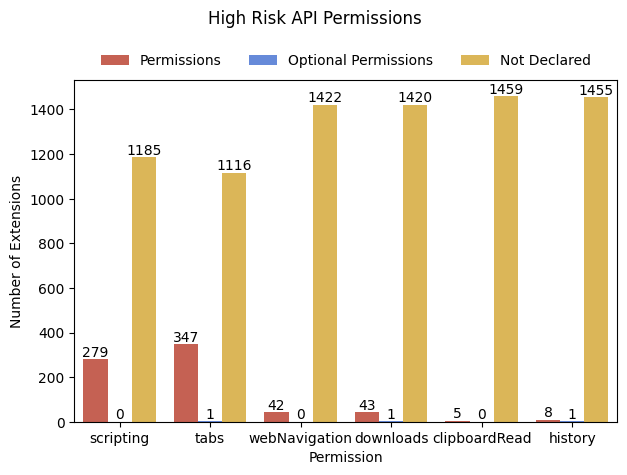

In [34]:
permission_types, declared_in = [], []
for perm in HIGH_RISK_API_PERMISSIONS:
    # get current permission's data
    key = f"where_{perm}"
    curr_declared_in = ext_df[key].to_numpy().flatten()
    curr_perm_types = [perm] * len(curr_declared_in)

    # add to full dict for plot
    permission_types.extend(curr_perm_types)
    declared_in.extend(curr_declared_in)

data_dict = {
    "Permission": permission_types,
    "Declared In": declared_in
}

fig, ax = plt.subplots()
sns.countplot(data=data_dict, 
              x="Permission", 
              hue="Declared In", 
              hue_order=["Permissions", "Optional Permissions", "Not Declared"],
              palette=["#d85240", "#5383ec", "#f1bf42"]
              )
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
for container in ax.containers:
    ax.bar_label(container)
plt.suptitle(f"High Risk API Permissions")
ax.set_xlabel("Permission")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Where High Risk API Permissions Were Declared", dpi=500)

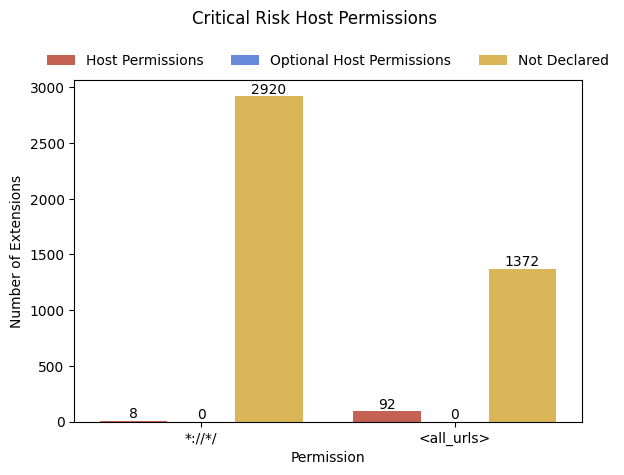

In [35]:
permission_types, declared_in = [], []
for perm in CRITICAL_RISK_HOST_PERMISSIONS:
    # get current permission's data
    key = f"where_{perm}"
    curr_declared_in = ext_df[key].to_numpy().flatten()
    curr_perm_types = [perm] * len(curr_declared_in)

    # add to full dict for plot
    permission_types.extend(curr_perm_types)
    declared_in.extend(curr_declared_in)

data_dict = {
    "Permission": permission_types,
    "Declared In": declared_in
}

fig, ax = plt.subplots()
sns.countplot(data=data_dict, 
              x="Permission", 
              hue="Declared In", 
              hue_order=["Host Permissions", "Optional Host Permissions", "Not Declared"],
              palette=["#d85240", "#5383ec", "#f1bf42"]
              )
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
for container in ax.containers:
    ax.bar_label(container)
plt.suptitle(f"Critical Risk Host Permissions")
ax.set_xlabel("Permission")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Where Critical Risk Host Permissions Were Declared", dpi=500)

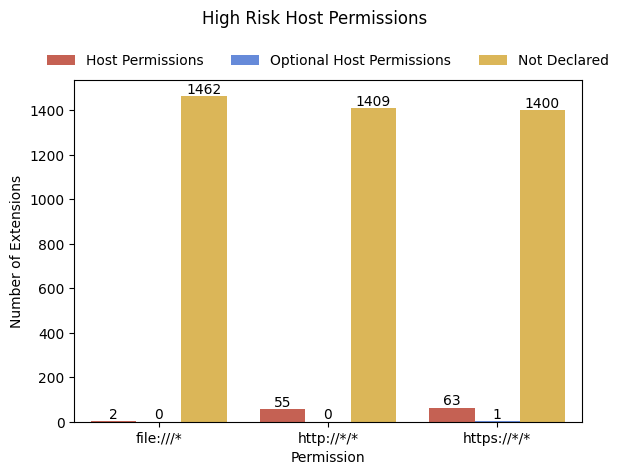

In [36]:
permission_types, declared_in = [], []
for perm in HIGH_RISK_HOST_PERMISSIONS:
    # get current permission's data
    key = f"where_{perm}"
    curr_declared_in = ext_df[key].to_numpy().flatten()
    curr_perm_types = [perm] * len(curr_declared_in)

    # add to full dict for plot
    permission_types.extend(curr_perm_types)
    declared_in.extend(curr_declared_in)

data_dict = {
    "Permission": permission_types,
    "Declared In": declared_in
}

fig, ax = plt.subplots()
sns.countplot(data=data_dict, 
              x="Permission", 
              hue="Declared In", 
              hue_order=["Host Permissions", "Optional Host Permissions", "Not Declared"],
              palette=["#d85240", "#5383ec", "#f1bf42"]
              )
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
for container in ax.containers:
    ax.bar_label(container)
plt.suptitle(f"High Risk Host Permissions")
ax.set_xlabel("Permission")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Where High Risk Host Permissions Were Declared", dpi=500)

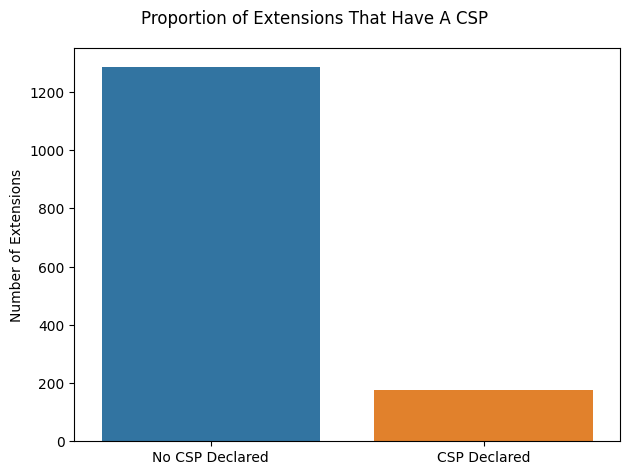

In [37]:
fig, ax = plt.subplots()
sns.countplot(data=ext_df, x="is_csp_declared")
plt.suptitle(f"Proportion of Extensions That Have A CSP")
ax.set_xlabel("")
ax.set_ylabel("Number of Extensions")
ax.set_xticks([0, 1], labels=["No CSP Declared", "CSP Declared"])
plt.tight_layout()
plt.savefig("Proportion of Extensions That Have A CSP", dpi=500)

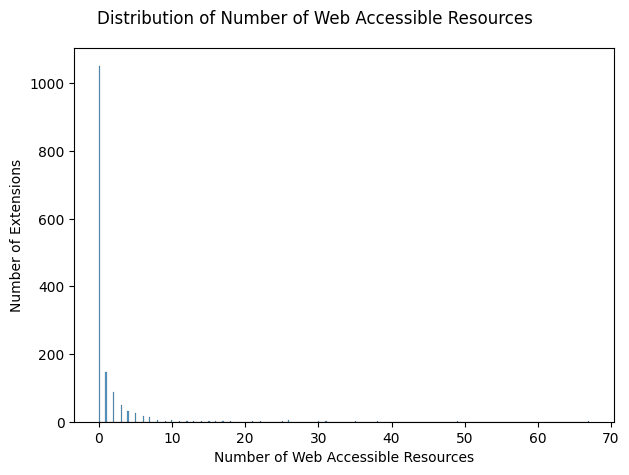

In [38]:
fig, ax = plt.subplots()
sns.histplot(data=ext_df, x="num_wars")
plt.suptitle(f"Distribution of Number of Web Accessible Resources")
ax.set_xlabel("Number of Web Accessible Resources")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Distribution of Number of Web Accessible Resources", dpi=500)

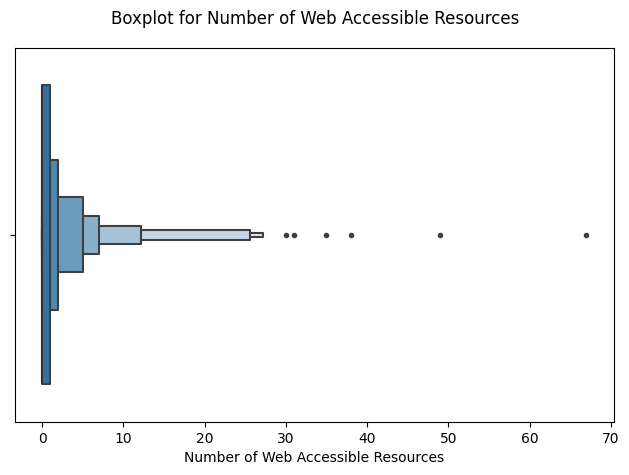

In [57]:
fig, ax = plt.subplots()
sns.boxenplot(data=ext_df, x="num_wars",flier_kws={"marker": "."})
plt.suptitle(f"Boxplot for Number of Web Accessible Resources")
ax.set_xlabel("Number of Web Accessible Resources")
plt.tight_layout()
plt.savefig("Boxplot for Number of Web Accessible Resources", dpi=500)

In [39]:
ext_df['num_wars'].describe()

count    1464.000000
mean        1.135929
std         3.852009
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        67.000000
Name: num_wars, dtype: float64

In [40]:
# NONE OF THE EXTENSIONS HAVE EXTERNALLY CONNECTABLE ENTITIES?
# If the externally_connectable key is not declared in your extension's 
# manifest, all extensions can connect, but no webpages can connect.
ext_df['num_ext_conn'].describe()

count    1464.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: num_ext_conn, dtype: float64

#### DoubleX Analysis

Interesting observations:
1. Exfiltration dangers only from BP 

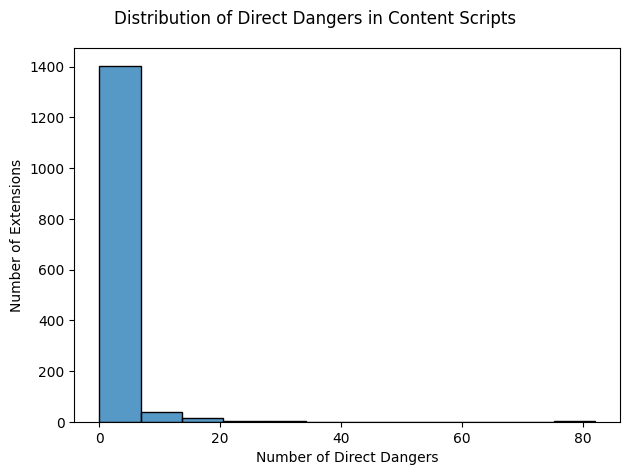

In [41]:
fig, ax = plt.subplots()
sns.histplot(data=ext_df, x="num_cs_direct_dangers")
plt.suptitle(f"Distribution of Direct Dangers in Content Scripts")
ax.set_xlabel("Number of Direct Dangers")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Distribution of Direct Dangers in Content Scripts", dpi=500)

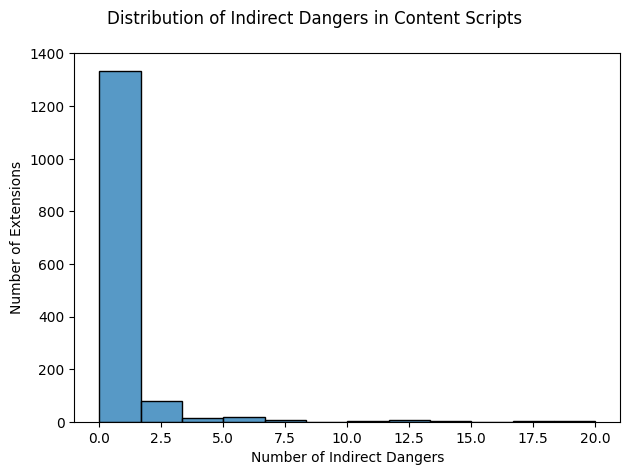

In [42]:
fig, ax = plt.subplots()
sns.histplot(data=ext_df, x="num_cs_indirect_dangers")
plt.suptitle(f"Distribution of Indirect Dangers in Content Scripts")
ax.set_xlabel("Number of Indirect Dangers")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Distribution of Indirect Dangers in Content Scripts", dpi=500)

In [43]:
# NO CONTENT SCRIPT EXFIL DANGERS
ext_df['num_cs_exfil_dangers'].describe()

count    1464.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: num_cs_exfil_dangers, dtype: float64

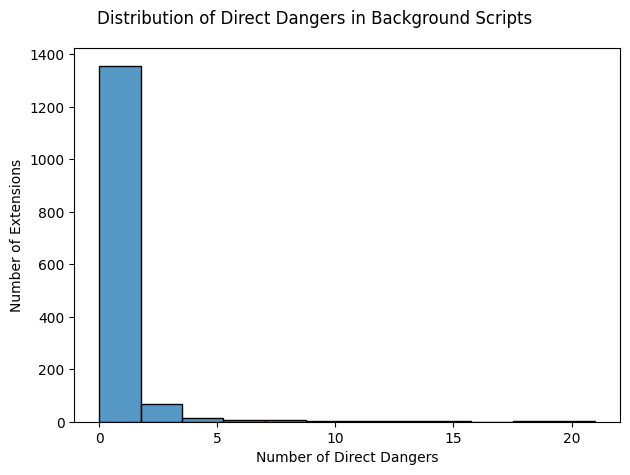

In [44]:
fig, ax = plt.subplots()
sns.histplot(data=ext_df, x="num_bp_direct_dangers")
plt.suptitle(f"Distribution of Direct Dangers in Background Scripts")
ax.set_xlabel("Number of Direct Dangers")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Distribution of Direct Dangers in Background Scripts", dpi=500)

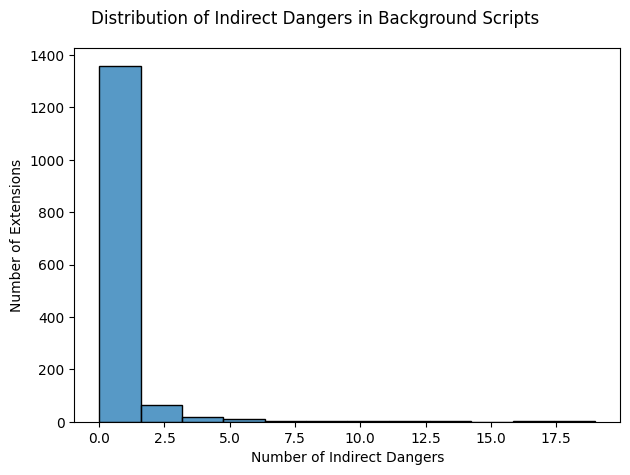

In [45]:
fig, ax = plt.subplots()
sns.histplot(data=ext_df, x="num_bp_indirect_dangers")
plt.suptitle(f"Distribution of Indirect Dangers in Background Scripts")
ax.set_xlabel("Number of Indirect Dangers")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Distribution of Indirect Dangers in Background Scripts", dpi=500)

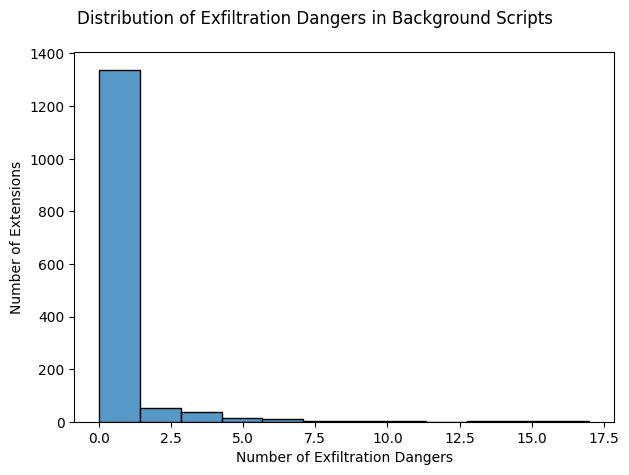

In [46]:
fig, ax = plt.subplots()
sns.histplot(data=ext_df, x="num_bp_exfil_dangers")
plt.suptitle(f"Distribution of Exfiltration Dangers in Background Scripts")
ax.set_xlabel("Number of Exfiltration Dangers")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Distribution of Exfiltration Dangers in Background Scripts", dpi=500)

#### DoubleX Analysis By Category

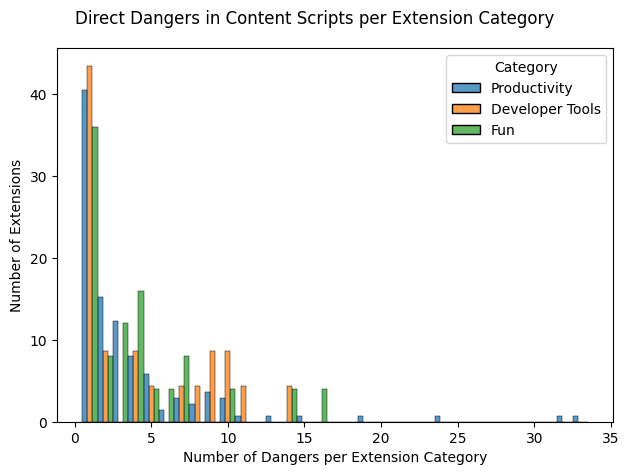

In [47]:
reduced_df = ext_df.loc[(ext_df['category'].isin(['Productivity', 'Fun', 'Developer Tools'])) & (ext_df['num_cs_direct_dangers'] > 0)]

fig, ax = plt.subplots()
sns.histplot(
    data=reduced_df, x="num_cs_direct_dangers", 
    hue="category", 
    hue_order=["Productivity", "Developer Tools", "Fun"],
    # when using a hue semantic with discrete data, it can make sense to “dodge” the levels
    multiple="dodge",
    # normalize so that each bar’s height shows a probability, proportion, or percent, which make more sense for discrete variables
    stat="percent", 
    discrete=True, 
    # to compare the distribution of subsets that differ substantially in size, use independent density normalization
    common_norm=False
)
sns.move_legend(
    ax, "upper right",
    title="Category"
)
plt.suptitle(f"Direct Dangers in Content Scripts per Extension Category")
ax.set_xlabel("Number of Dangers per Extension Category")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Direct Dangers in Content Scripts per Extension Category", dpi=500)

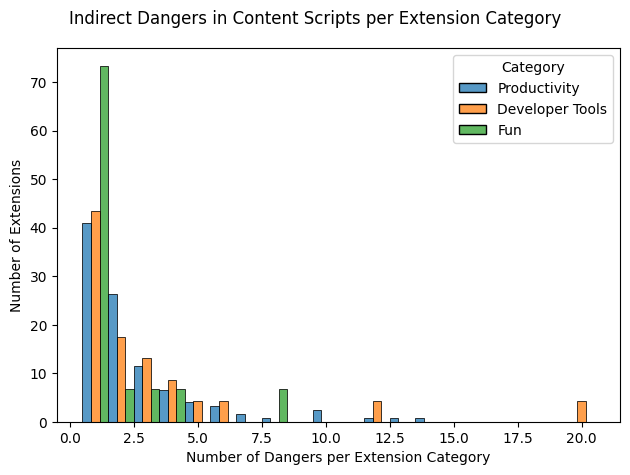

In [48]:
reduced_df = ext_df.loc[(ext_df['category'].isin(['Productivity', 'Fun', 'Developer Tools'])) & (ext_df['num_cs_indirect_dangers'] > 0)]

fig, ax = plt.subplots()
sns.histplot(
    data=reduced_df, x="num_cs_indirect_dangers", 
    hue="category", 
    hue_order=["Productivity", "Developer Tools", "Fun"],
    # when using a hue semantic with discrete data, it can make sense to “dodge” the levels
    multiple="dodge",
    # normalize so that each bar’s height shows a probability, proportion, or percent, which make more sense for discrete variables
    stat="percent", 
    discrete=True, 
    # to compare the distribution of subsets that differ substantially in size, use independent density normalization
    common_norm=False,
)
sns.move_legend(
    ax, "upper right",
    title="Category"
)
plt.suptitle(f"Indirect Dangers in Content Scripts per Extension Category")
ax.set_xlabel("Number of Dangers per Extension Category")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Indirect Dangers in Content Scripts per Extension Category", dpi=500)

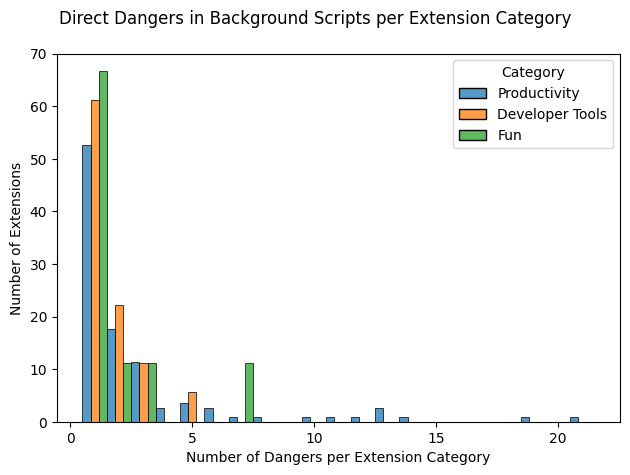

In [49]:
reduced_df = ext_df.loc[(ext_df['category'].isin(['Productivity', 'Fun', 'Developer Tools'])) & (ext_df['num_bp_direct_dangers'] > 0)]

fig, ax = plt.subplots()
sns.histplot(
    data=reduced_df, x="num_bp_direct_dangers", 
    hue="category", 
    hue_order=["Productivity", "Developer Tools", "Fun"],
    # when using a hue semantic with discrete data, it can make sense to “dodge” the levels
    multiple="dodge",
    # normalize so that each bar’s height shows a probability, proportion, or percent, which make more sense for discrete variables
    stat="percent", 
    discrete=True, 
    # to compare the distribution of subsets that differ substantially in size, use independent density normalization
    common_norm=False,
)
sns.move_legend(
    ax, "upper right",
    title="Category"
)
plt.suptitle(f"Direct Dangers in Background Scripts per Extension Category")
ax.set_xlabel("Number of Dangers per Extension Category")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Direct Dangers in Background Scripts per Extension Category", dpi=500)

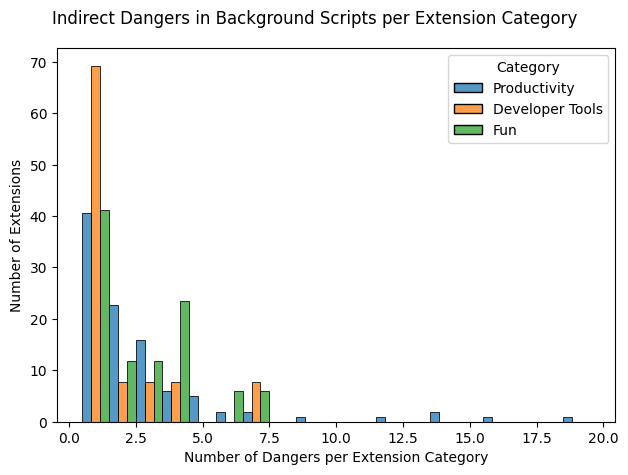

In [50]:
reduced_df = ext_df.loc[(ext_df['category'].isin(['Productivity', 'Fun', 'Developer Tools'])) & (ext_df['num_bp_indirect_dangers'] > 0)]

fig, ax = plt.subplots()
sns.histplot(
    data=reduced_df, x="num_bp_indirect_dangers", 
    hue="category", 
    hue_order=["Productivity", "Developer Tools", "Fun"],
    # when using a hue semantic with discrete data, it can make sense to “dodge” the levels
    multiple="dodge",
    # normalize so that each bar’s height shows a probability, proportion, or percent, which make more sense for discrete variables
    stat="percent", 
    discrete=True, 
    # to compare the distribution of subsets that differ substantially in size, use independent density normalization
    common_norm=False,
)
sns.move_legend(
    ax, "upper right",
    title="Category"
)
plt.suptitle(f"Indirect Dangers in Background Scripts per Extension Category")
ax.set_xlabel("Number of Dangers per Extension Category")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Indirect Dangers in Background Scripts per Extension Category", dpi=500)

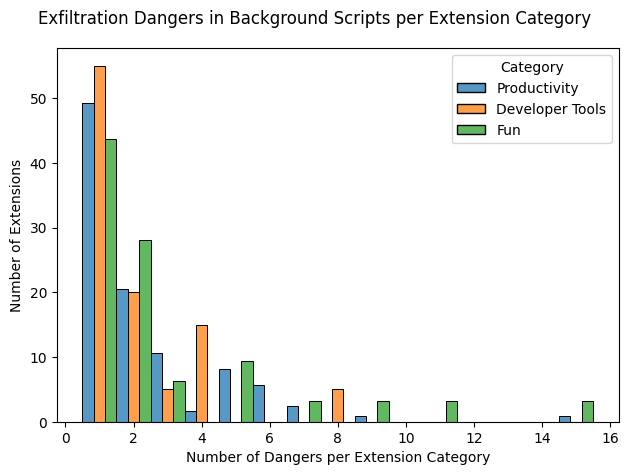

In [51]:
reduced_df = ext_df.loc[(ext_df['category'].isin(['Productivity', 'Fun', 'Developer Tools'])) & (ext_df['num_bp_exfil_dangers'] > 0)]

fig, ax = plt.subplots()
sns.histplot(
    data=reduced_df, x="num_bp_exfil_dangers", 
    hue="category", 
    hue_order=["Productivity", "Developer Tools", "Fun"],
    # when using a hue semantic with discrete data, it can make sense to “dodge” the levels
    multiple="dodge",
    # normalize so that each bar’s height shows a probability, proportion, or percent, which make more sense for discrete variables
    stat="percent", 
    discrete=True, 
    # to compare the distribution of subsets that differ substantially in size, use independent density normalization
    common_norm=False,
)
sns.move_legend(
    ax, "upper right",
    title="Category"
)
plt.suptitle(f"Exfiltration Dangers in Background Scripts per Extension Category")
ax.set_xlabel("Number of Dangers per Extension Category")
ax.set_ylabel("Number of Extensions")
plt.tight_layout()
plt.savefig("Exfiltration Dangers in Background Scripts per Extension Category", dpi=500)

#### Feature Engineering

- need to normalize num user columns?
- average rating comes from number of reviewers only?

In [52]:
import sklearn
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler, RobustScaler

804


<Axes: >

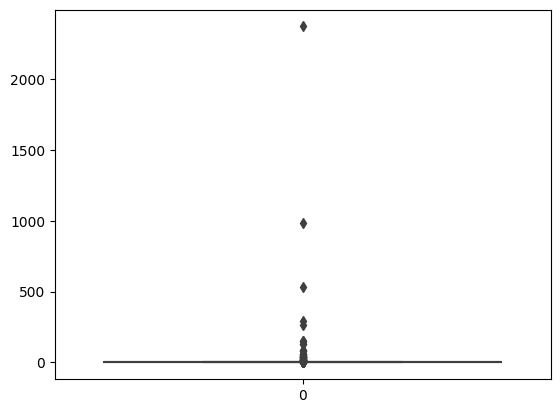

In [53]:
scaler = RobustScaler()
reduced_df = ext_df.loc[ext_df['num_users_who_rated'] > 0]
data = reduced_df['num_users_who_rated'].to_numpy().reshape(-1, 1)
scaler.fit(data)
normalized_data = scaler.transform(data).flatten()
print(len(normalized_data))
sns.boxplot(data=normalized_data)

#### Analyze Dataset

- clustering?
- regression: category vs type of danger?

In [54]:
ext_df['all_direct_dangers'] = ext_df[['num_cs_direct_dangers', 'num_bp_direct_dangers']].sum(axis=1)
ext_df['all_indirect_dangers'] = ext_df[['num_cs_indirect_dangers', 'num_bp_indirect_dangers']].sum(axis=1)
ext_df['all_exfil_dangers'] = ext_df[['num_cs_exfil_dangers', 'num_bp_exfil_dangers']].sum(axis=1)

In [55]:
from sklearn.preprocessing import OrdinalEncoder

category_og = ext_df['category'].to_numpy().reshape(-1, 1)
enc = OrdinalEncoder()
enc.fit(category_og)
category_ohe = enc.transform(category_og).flatten()
ext_df['category_ohe'] = category_ohe

In [56]:
ext_df

,extension_id,avg_rating,num_users_who_rated,num_users_who_downloaded,category,num_api_permissions,num_host_permissions,is_csp_declared,num_wars,num_ext_conn,...,num_cs_direct_dangers,num_cs_indirect_dangers,num_cs_exfil_dangers,num_bp_direct_dangers,num_bp_indirect_dangers,num_bp_exfil_dangers,all_direct_dangers,all_indirect_dangers,all_exfil_dangers,category_ohe
0,hfmgojlegmbjoacgdocldnbgndbehejc,0.0,0,5,Productivity,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.0
1,ifniehnojokofonkklceecajlecbcfjl,0.0,0,10,Developer Tools,2,0,1,0,0,...,1,3,0,0,0,1,1,3,1,2.0
2,ededkpbhbbdncjajeklocejfkedhhikm,0.0,0,3,Accessibility,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,eokcnpmhpilgomehaaboihllcgpmncko,0.0,0,382,Productivity,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.0
4,jnbmekkgllcampcfjkobpffkfglolekn,5.0,2,8,Productivity,4,1,0,4,0,...,0,0,0,3,0,0,3,0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,komooichefkcbdhhhicpplicceldpcmn,5.0,1,30,Social & Communication,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.0
1460,phgkmeaegpeoaobbicikppbbidcljhok,0.0,0,12,Productivity,5,1,1,3,0,...,0,6,0,5,3,5,5,9,5,8.0
1461,oodgegammlfboachpohoiodepmifalke,5.0,2,3,Productivity,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.0
1462,fafmeoecefijagoogbkipapmjdnmbkgi,0.0,0,33,Productivity,4,3,0,0,0,...,0,0,0,0,1,3,0,1,3,8.0
